In [147]:
from scipy.integrate import solve_ivp

In [153]:
def inv_pend(t, y, c):
    theta, o = y
    return([o, + c**2 * np.sin(theta)])
def inv_pend_app(t, y, c):
    theta, o = y
    return([o, + c**2 * theta])

length = .1 # meters
mass = 0.01 # kg
omega = np.sqrt(9.81 / length)

def omega0(theta0, m, length):
    return (ac.hbar.si.value / 2 / m / length**2 / theta0)

def fallen(t, y, *args):
    return(y[0] - np.pi/2)
fallen.terminal = True

In [186]:
theta0_array = np.logspace(-17, -14.3, num=100)

@np.vectorize
def time(theta0, m=mass, length=length, omega=omega):
    y0 = [theta0, omega0(theta0, m, length)]
    sol = solve_ivp(inv_pend, (0, 20), y0, args=(omega,), events=fallen, atol=1e-20)
    event_times = sol.t_events[0]
    if len(event_times)>0:
        return(sol.t_events[0][0])
    else:
        return(None)

@np.vectorize
def time_app(theta0, m=mass, length=length, omega=omega):
    y0 = [theta0, omega0(theta0, m, length)]
    sol = solve_ivp(inv_pend_app, (0, 20), y0, args=(omega,), events=fallen, atol=1e-20)
    event_times = sol.t_events[0]
    if len(event_times)>0:
        return(sol.t_events[0][0])
    else:
        return(None)

Text(0, 0.5, 'Time until falling')

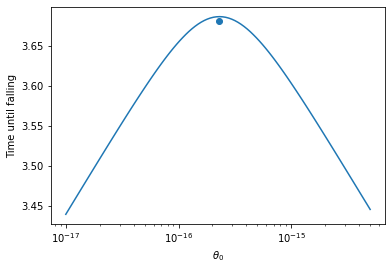

In [191]:
times_array = time(theta0_array)
plt.semilogx(theta0_array, times_array)

analytical_theta0 = np.sqrt(ac.hbar.si.value / (omega * 2 * mass * length**2))
analytical_omega0 = np.sqrt(omega * ac.hbar.si.value / ( 2 * mass * length**2))
analytical_time = np.log(np.pi / (analytical_omega0 / omega + analytical_theta0)) / omega
plt.scatter(analytical_theta0, analytical_time)

plt.xlabel('$\\theta_0$')
plt.ylabel('Time until falling')

Text(0, 0.5, '$\\theta_0 + \\omega_0 / \\omega$')

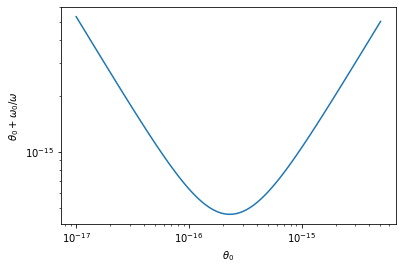

In [188]:
plt.loglog(theta0_array, omega0(theta0_array, mass, length) / omega + theta0_array)
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_0 + \\omega_0 / \\omega$')

Text(0, 0.5, 'Angle from the vertical')

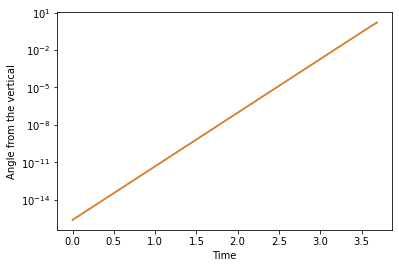

In [189]:
y0 = [analytical_theta0, omega0(analytical_theta0, mass, length)]
sol = solve_ivp(inv_pend, (0, 5), y0, args=(omega,), events=fallen, atol=1e-20)
times = sol.t
plt.semilogy(times, sol.y[0])
# plt.semilogy(times, sol.y[1])

A = (analytical_omega0 / omega + analytical_theta0) / 2
analytical_sol = A * np.exp(omega * times)
plt.semilogy(times, analytical_sol)
plt.xlabel('Time')
plt.ylabel('Angle from the vertical')